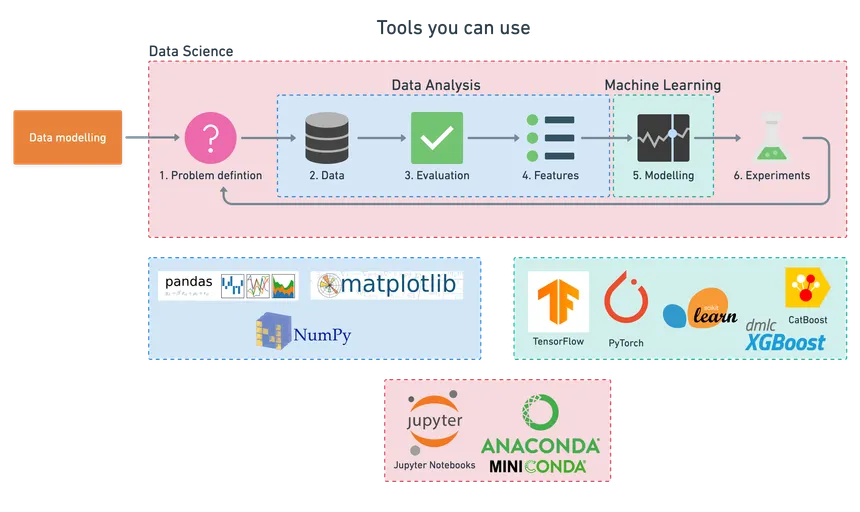

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
import mlflow
from mlflow.models import infer_signature

In [3]:
# set uri
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [4]:
## load data
X, y = datasets.load_iris(return_X_y=True)

In [5]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# model
params = {"penalty": "l2", "solver":"lbfgs", "max_iter":10, "multi_class":"auto", "random_state": 8888}
params

{'penalty': 'l2',
 'solver': 'lbfgs',
 'max_iter': 10,
 'multi_class': 'auto',
 'random_state': 8888}

In [7]:
lr=LogisticRegression(**params)
lr.fit(X_train, y_train)

c:\Users\Seu Computador\Documents\Github\mlops-playground\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Seu Computador\Documents\Github\mlops-playground\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,8888
,solver,'lbfgs'
,max_iter,10
,multi_class,'auto'


In [8]:
preds = lr.predict(X_test)

In [9]:
accuracy=accuracy_score(y_test, preds)
accuracy

1.0

## Tracking

In [10]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [11]:
mlflow.set_experiment("ML Logit")

with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.set_tag("Traning Info", "Basic LR form IRIS")

    signature=infer_signature(X_train, lr.predict(X_train))

    model_info=mlflow.sklearn.log_model(
        sk_model=lr,
        name="iris_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="tracking-lr"
    )

2025/11/02 18:44:38 INFO mlflow.tracking.fluent: Experiment with name 'ML Logit' does not exist. Creating a new experiment.
Successfully registered model 'tracking-lr'.
2025/11/02 18:44:51 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-lr, version 1
Created version '1' of model 'tracking-lr'.


🏃 View run gaudy-snipe-908 at: http://127.0.0.1:5000/#/experiments/317059349136214785/runs/4cf919a30d9b41dd8561511f6f158cca
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/317059349136214785


In [12]:
mlflow.set_experiment("ML Logit2")

with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.set_tag("Traning Info", "Basic LR form IRIS")

    signature=infer_signature(X_train, lr.predict(X_train))

    model_info=mlflow.sklearn.log_model(
        sk_model=lr,
        name="iris_model_2",
        signature=signature,
        input_example=X_train,
        registered_model_name="tracking-lr-2"
    )

2025/11/02 18:44:51 INFO mlflow.tracking.fluent: Experiment with name 'ML Logit2' does not exist. Creating a new experiment.


Successfully registered model 'tracking-lr-2'.
2025/11/02 18:44:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-lr-2, version 1
Created version '1' of model 'tracking-lr-2'.


🏃 View run secretive-skunk-616 at: http://127.0.0.1:5000/#/experiments/376387422819341096/runs/e6cd378ef66d44e6813ca56146e96baa
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/376387422819341096


'models:/m-608ad5722fe541e090cfd316db6a42f4'

In [17]:
from mlflow.models import validate_serving_input
model_uri = model_info.model_uri

serving_payload = """{
  "inputs": [
  [
    4.6,
    3.6,
    1,
    0.2
  ],
  [
    5.7,
    4.4,
    1.5,
    0.4
  ],
  [
    6.7,
    3.1,
    4.4,
    1.4
  ],
  [
    4.8,
    3.4,
    1.6,
    0.2
  ],
  [
    4.4,
    3.2,
    1.3,
    0.2
  ],
  [
    6.3,
    2.5,
    5,
    1.9
  ],
  [
    6.4,
    3.2,
    4.5,
    1.5
  ],
  [
    5.2,
    3.5,
    1.5,
    0.2
  ],
  [
    5,
    3.6,
    1.4,
    0.2
  ],
  [
    5.2,
    4.1,
    1.5,
    0.1
  ],
  [
    5.8,
    2.7,
    5.1,
    1.9
  ],
  [
    6,
    3.4,
    4.5,
    1.6
  ],
  [
    6.7,
    3.1,
    4.7,
    1.5
  ],
  [
    5.4,
    3.9,
    1.3,
    0.4
  ],
  [
    5.4,
    3.7,
    1.5,
    0.2
  ],
  [
    5.5,
    2.4,
    3.7,
    1
  ],
  [
    6.3,
    2.8,
    5.1,
    1.5
  ],
  [
    6.4,
    3.1,
    5.5,
    1.8
  ],
  [
    6.6,
    3,
    4.4,
    1.4
  ],
  [
    7.2,
    3.6,
    6.1,
    2.5
  ],
  [
    5.7,
    2.9,
    4.2,
    1.3
  ],
  [
    7.6,
    3,
    6.6,
    2.1
  ],
  [
    5.6,
    3,
    4.5,
    1.5
  ],
  [
    5.1,
    3.5,
    1.4,
    0.2
  ],
  [
    7.7,
    2.8,
    6.7,
    2
  ],
  [
    5.8,
    2.7,
    4.1,
    1
  ],
  [
    5.2,
    3.4,
    1.4,
    0.2
  ],
  [
    5,
    3.5,
    1.3,
    0.3
  ],
  [
    5.1,
    3.8,
    1.9,
    0.4
  ],
  [
    5,
    2,
    3.5,
    1
  ],
  [
    6.3,
    2.7,
    4.9,
    1.8
  ],
  [
    4.8,
    3.4,
    1.9,
    0.2
  ],
  [
    5,
    3,
    1.6,
    0.2
  ],
  [
    5.1,
    3.3,
    1.7,
    0.5
  ],
  [
    5.6,
    2.7,
    4.2,
    1.3
  ],
  [
    5.1,
    3.4,
    1.5,
    0.2
  ],
  [
    5.7,
    3,
    4.2,
    1.2
  ],
  [
    7.7,
    3.8,
    6.7,
    2.2
  ],
  [
    4.6,
    3.2,
    1.4,
    0.2
  ],
  [
    6.2,
    2.9,
    4.3,
    1.3
  ],
  [
    5.7,
    2.5,
    5,
    2
  ],
  [
    5.5,
    4.2,
    1.4,
    0.2
  ],
  [
    6,
    3,
    4.8,
    1.8
  ],
  [
    5.8,
    2.7,
    5.1,
    1.9
  ],
  [
    6,
    2.2,
    4,
    1
  ],
  [
    5.4,
    3,
    4.5,
    1.5
  ],
  [
    6.2,
    3.4,
    5.4,
    2.3
  ],
  [
    5.5,
    2.3,
    4,
    1.3
  ],
  [
    5.4,
    3.9,
    1.7,
    0.4
  ],
  [
    5,
    2.3,
    3.3,
    1
  ],
  [
    6.4,
    2.7,
    5.3,
    1.9
  ],
  [
    5,
    3.3,
    1.4,
    0.2
  ],
  [
    5,
    3.2,
    1.2,
    0.2
  ],
  [
    5.5,
    2.4,
    3.8,
    1.1
  ],
  [
    6.7,
    3,
    5,
    1.7
  ],
  [
    4.9,
    3.1,
    1.5,
    0.2
  ],
  [
    5.8,
    2.8,
    5.1,
    2.4
  ],
  [
    5,
    3.4,
    1.5,
    0.2
  ],
  [
    5,
    3.5,
    1.6,
    0.6
  ],
  [
    5.9,
    3.2,
    4.8,
    1.8
  ],
  [
    5.1,
    2.5,
    3,
    1.1
  ],
  [
    6.9,
    3.2,
    5.7,
    2.3
  ],
  [
    6,
    2.7,
    5.1,
    1.6
  ],
  [
    6.1,
    2.6,
    5.6,
    1.4
  ],
  [
    7.7,
    3,
    6.1,
    2.3
  ],
  [
    5.5,
    2.5,
    4,
    1.3
  ],
  [
    4.4,
    2.9,
    1.4,
    0.2
  ],
  [
    4.3,
    3,
    1.1,
    0.1
  ],
  [
    6,
    2.2,
    5,
    1.5
  ],
  [
    7.2,
    3.2,
    6,
    1.8
  ],
  [
    4.6,
    3.1,
    1.5,
    0.2
  ],
  [
    5.1,
    3.5,
    1.4,
    0.3
  ],
  [
    4.4,
    3,
    1.3,
    0.2
  ],
  [
    6.3,
    2.5,
    4.9,
    1.5
  ],
  [
    6.3,
    3.4,
    5.6,
    2.4
  ],
  [
    4.6,
    3.4,
    1.4,
    0.3
  ],
  [
    6.8,
    3,
    5.5,
    2.1
  ],
  [
    6.3,
    3.3,
    6,
    2.5
  ],
  [
    4.7,
    3.2,
    1.3,
    0.2
  ],
  [
    6.1,
    2.9,
    4.7,
    1.4
  ],
  [
    6.5,
    2.8,
    4.6,
    1.5
  ],
  [
    6.2,
    2.8,
    4.8,
    1.8
  ],
  [
    7,
    3.2,
    4.7,
    1.4
  ],
  [
    6.4,
    3.2,
    5.3,
    2.3
  ],
  [
    5.1,
    3.8,
    1.6,
    0.2
  ],
  [
    6.9,
    3.1,
    5.4,
    2.1
  ],
  [
    5.9,
    3,
    4.2,
    1.5
  ],
  [
    6.5,
    3,
    5.2,
    2
  ],
  [
    5.7,
    2.6,
    3.5,
    1
  ],
  [
    5.2,
    2.7,
    3.9,
    1.4
  ],
  [
    6.1,
    3,
    4.6,
    1.4
  ],
  [
    4.5,
    2.3,
    1.3,
    0.3
  ],
  [
    6.6,
    2.9,
    4.6,
    1.3
  ],
  [
    5.5,
    2.6,
    4.4,
    1.2
  ],
  [
    5.3,
    3.7,
    1.5,
    0.2
  ],
  [
    5.6,
    3,
    4.1,
    1.3
  ],
  [
    7.3,
    2.9,
    6.3,
    1.8
  ],
  [
    6.7,
    3.3,
    5.7,
    2.1
  ],
  [
    5.1,
    3.7,
    1.5,
    0.4
  ],
  [
    4.9,
    2.4,
    3.3,
    1
  ],
  [
    6.7,
    3.3,
    5.7,
    2.5
  ],
  [
    7.2,
    3,
    5.8,
    1.6
  ],
  [
    4.9,
    3.6,
    1.4,
    0.1
  ],
  [
    6.7,
    3.1,
    5.6,
    2.4
  ],
  [
    4.9,
    3,
    1.4,
    0.2
  ],
  [
    6.9,
    3.1,
    4.9,
    1.5
  ],
  [
    7.4,
    2.8,
    6.1,
    1.9
  ],
  [
    6.3,
    2.9,
    5.6,
    1.8
  ],
  [
    5.7,
    2.8,
    4.1,
    1.3
  ],
  [
    6.5,
    3,
    5.5,
    1.8
  ],
  [
    6.3,
    2.3,
    4.4,
    1.3
  ],
  [
    6.4,
    2.9,
    4.3,
    1.3
  ],
  [
    5.6,
    2.8,
    4.9,
    2
  ],
  [
    5.9,
    3,
    5.1,
    1.8
  ],
  [
    5.4,
    3.4,
    1.7,
    0.2
  ],
  [
    6.1,
    2.8,
    4,
    1.3
  ],
  [
    4.9,
    2.5,
    4.5,
    1.7
  ],
  [
    5.8,
    4,
    1.2,
    0.2
  ],
  [
    5.8,
    2.6,
    4,
    1.2
  ],
  [
    7.1,
    3,
    5.9,
    2.1
  ]
]
}"""

In [18]:
validate_serving_input(model_uri, serving_payload)

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])